# Spark SE Prep Assignment 8
### Dataset Analysis

## Install & Import Necessary Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip3 install -U ucimlrepo 

from ucimlrepo import fetch_ucirepo 


In [7]:
# fetch dataset 
heart_disease = fetch_ucirepo(name='Heart Disease') 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# EDA
## Summary Statistics

In [8]:
print(X.describe())
print(Y.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

# Visualization

* Some graphs exclude participants with no heart disease to compare just the severity levels of heart disease against another variable

## Variable: Age

<=40: 18
40-50: 76
50-60: 130
60-70: 73
>=70: 6


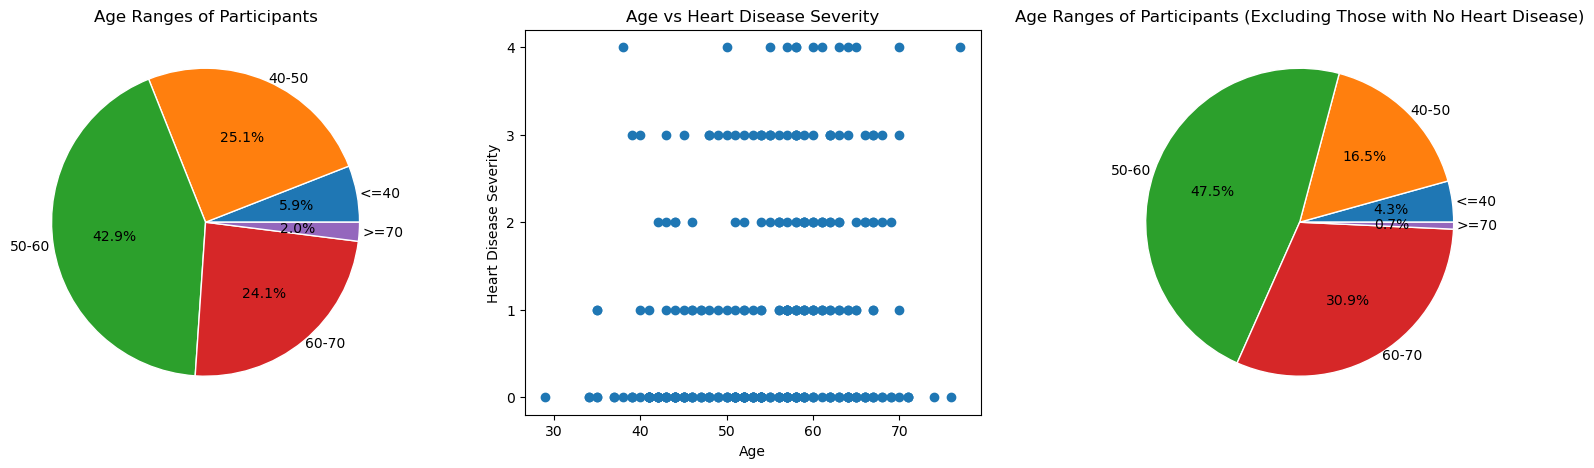


Excluding Those with No Heart Disease
<=40: 6
40-50: 23
50-60: 66
60-70: 43
>=70: 1


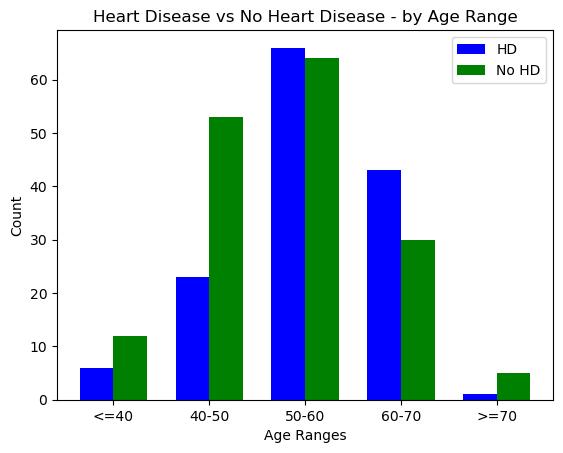

In [12]:
import matplotlib.ticker as mticker

# Age vs Heart Disease Severity
uptoforty = 0
fortytofifty = 0
fiftytosixty = 0
sixtytoseventy = 0
seventy = 0
for p in X['age']:
    if p <=40:
        uptoforty += 1
    elif p <=50:
        fortytofifty += 1
    elif p<=60:
        fiftytosixty += 1
    elif p <=70:
        sixtytoseventy += 1
    else:
        seventy += 1

x = [uptoforty, fortytofifty, fiftytosixty, sixtytoseventy, seventy]
labels = ["<=40", "40-50", "50-60", "60-70", ">=70"]

x1 = X['age']
y1 = Y['num']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].pie(x, labels=labels, labeldistance=1.02, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[0].set_title('Age Ranges of Participants')

ax[1].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].scatter(x1, y1)
ax[1].set_title('Age vs Heart Disease Severity')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Heart Disease Severity')
for label, count in zip(labels, x):
    print(f"{label}: {count}")
nuptoforty = 0
nfortytofifty = 0
nfiftytosixty = 0
nsixtytoseventy = 0
nseventy = 0
for age, severity in zip(X['age'], Y['num']):
    if severity != 0:
        if age <=40:
            nuptoforty += 1
        elif age <=50:
            nfortytofifty += 1
        elif age <=60:
            nfiftytosixty += 1
        elif age <=70:
            nsixtytoseventy += 1
        else:
            nseventy += 1

x2 = [nuptoforty, nfortytofifty, nfiftytosixty, nsixtytoseventy, nseventy]
labels = ["<=40", "40-50", "50-60", "60-70", ">=70"]

ax[2].pie(x2, labels=labels, labeldistance=1.02, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[2].set_title('Age Ranges of Participants (Excluding Those with No Heart Disease)')
plt.show()

print("\nExcluding Those with No Heart Disease")
for label, count in zip(labels, x2):
    print(f"{label}: {count}")

zuptoforty = 0
zfortytofifty = 0
zfiftytosixty = 0
zsixtytoseventy = 0
zseventy = 0
for age, severity in zip(X['age'], Y['num']):
    if severity == 0:
        if age <=40:
            zuptoforty += 1
        elif age <=50:
            zfortytofifty += 1
        elif age <=60:
            zfiftytosixty += 1
        elif age <=70:
            zsixtytoseventy += 1
        else:
            zseventy += 1
z = [zuptoforty, zfortytofifty, zfiftytosixty, zsixtytoseventy, zseventy]

bar_width = 0.35
r1 = np.arange(len(labels))
r2 = [n + bar_width for n in r1]
plt.bar(r1, x2, color='blue', width=bar_width, label='HD')
plt.bar(r2, z, color='green', width=bar_width, label='No HD')

plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Heart Disease vs No Heart Disease - by Age Range')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.legend()

## Variable: Sex

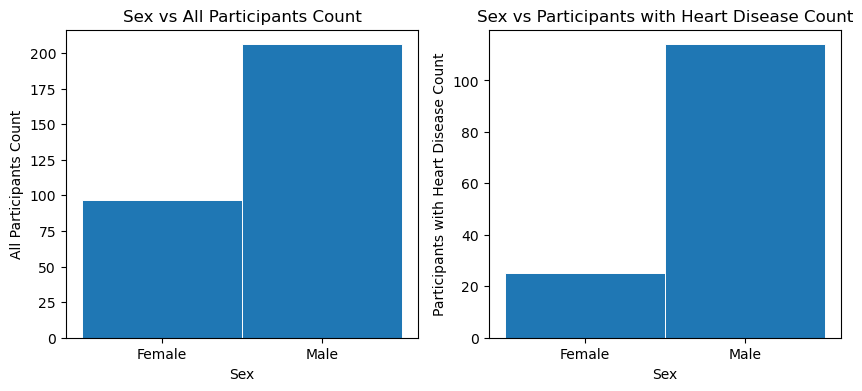

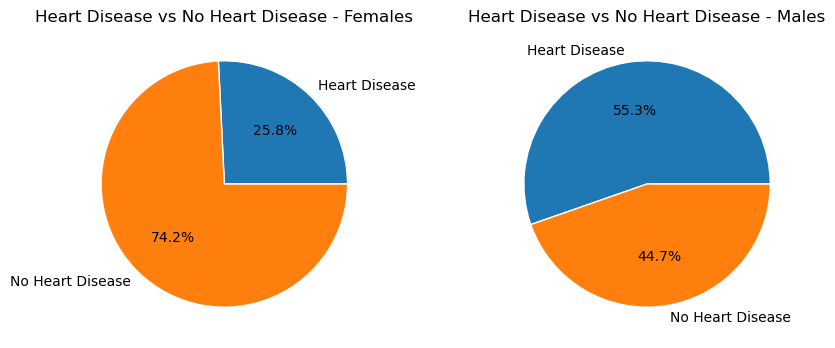

All Females: 97
All Males: 206
Females with Heart Disease: 25
Males with Heart Disease: 114
Females with No Heart Disease: 72
Males with No Heart Disease: 92


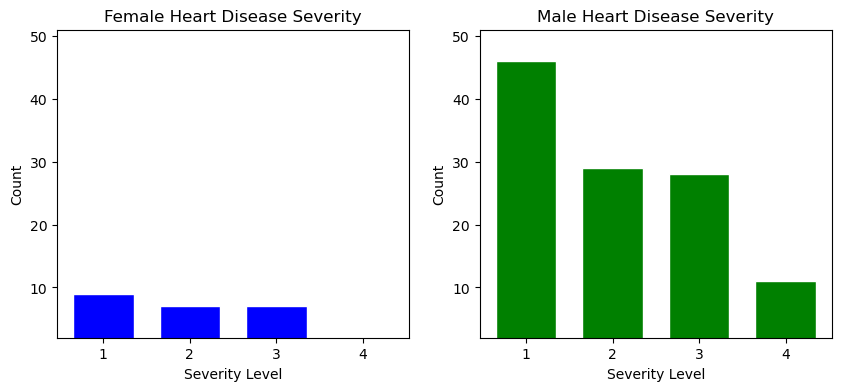

Female: [9, 7, 7, 2]
Male: [46, 29, 28, 11]


In [13]:
#Sex
all_fem = 0
all_male = 0
for sex, severity in zip(X['sex'], Y['num']):
       if sex == 0.0:
              all_fem += 1
       else:
              all_male += 1
female = 0
f_sev = [0] * 4
male = 0
m_sev = [0] * 4
for sex, severity in zip(X['sex'], Y['num']):
       if severity != 0:
              if sex == 0.0:
                     female += 1
                     f_sev[severity - 1] += 1
              else:
                     male += 1
                     m_sev[severity - 1] += 1
x = ['Female', 'Male']
y = [female, male]
y_all = [all_fem, all_male]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(x, y_all, width=1, edgecolor="white", linewidth=0.7)
ax[0].set_title('Sex vs All Participants Count')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('All Participants Count')

ax[1].bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax[1].set_title('Sex vs Participants with Heart Disease Count')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Participants with Heart Disease Count')
plt.show()

#Heart Disease vs No Heart Disease - by Sex
no_fem = 0
no_male = 0
for sex, severity in zip(X['sex'], Y['num']):
       if severity == 0:
              if sex == 0.0:
                     no_fem += 1
              else:
                     no_male += 1
y_no = [no_fem, no_male]
labels = ['Heart Disease', 'No Heart Disease']
fem_pie = [y[0], y_no[0]]
male_pie = [y[1], y_no[1]]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].pie(fem_pie, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[0].set_title('Heart Disease vs No Heart Disease - Females')
ax[1].pie(male_pie, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[1].set_title('Heart Disease vs No Heart Disease - Males')
plt.show()
print(f"All Females: {all_fem}")
print(f"All Males: {all_male}")
print(f"Females with Heart Disease: {female}")
print(f"Males with Heart Disease: {male}")
print(f"Females with No Heart Disease: {no_fem}")
print(f"Males with No Heart Disease: {no_male}")

#Severity by Sex
severity_levels = [1, 2, 3, 4]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[0].bar(severity_levels, f_sev, color='b', width=0.7, edgecolor="white")
ax[0].set_title('Female Heart Disease Severity')
ax[0].set_xlabel('Severity Level')
ax[0].set_ylabel('Count')

ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].bar(severity_levels, m_sev, color='g', width=0.7, edgecolor="white")
ax[1].set_title('Male Heart Disease Severity')
ax[1].set_xlabel('Severity Level')
ax[1].set_ylabel('Count')

y_min = min(min(f_sev), min(m_sev))
y_max = max(max(f_sev), max(m_sev))
ax[0].set_ylim(y_min, y_max + 5)  
ax[1].set_ylim(y_min, y_max + 5)

plt.show()
print(f"Female: {f_sev}")
print(f"Male: {m_sev}")

## Variable: Cholesterol

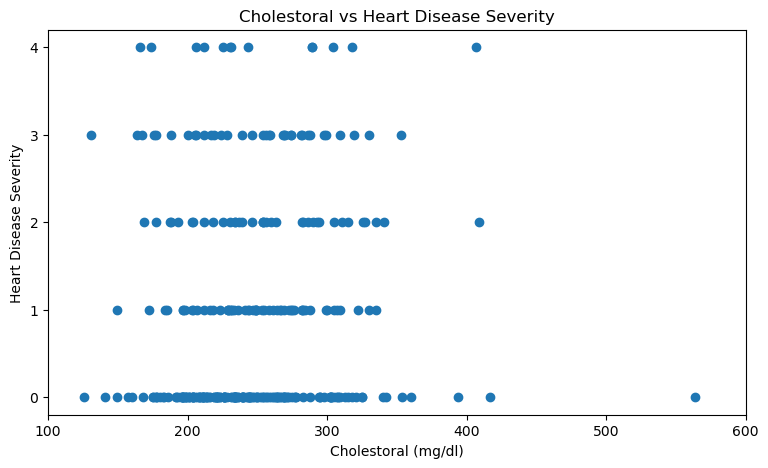

In [14]:
#Cholestoral
x = X['chol']
y = Y['num']

fig, ax = plt.subplots(figsize=(9, 5))
ax.set(xlim=(100, 600))
ax.scatter(x, y)
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.set_title('Cholestoral vs Heart Disease Severity')
ax.set_xlabel('Cholestoral (mg/dl)')
ax.set_ylabel('Heart Disease Severity')
plt.show()

## Variable: Chest Pain Types

Typical Chest Pain Count: 23
Atypical Chest Pain Count: 50
Non-Anginal Chest Pain Count: 86
Asymptomatic Chest Pain Count: 144

Excluding participants with no heart disease
Typical Chest Pain Count: 7
Atypical Chest Pain Count: 9
Non-Anginal Chest Pain Count: 18
Asymptomatic Chest Pain Count: 105


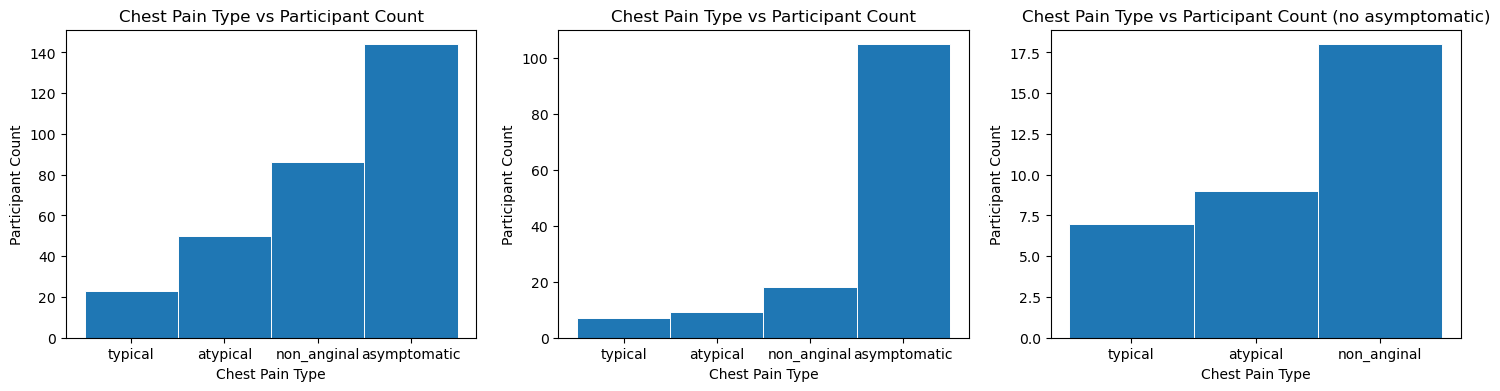

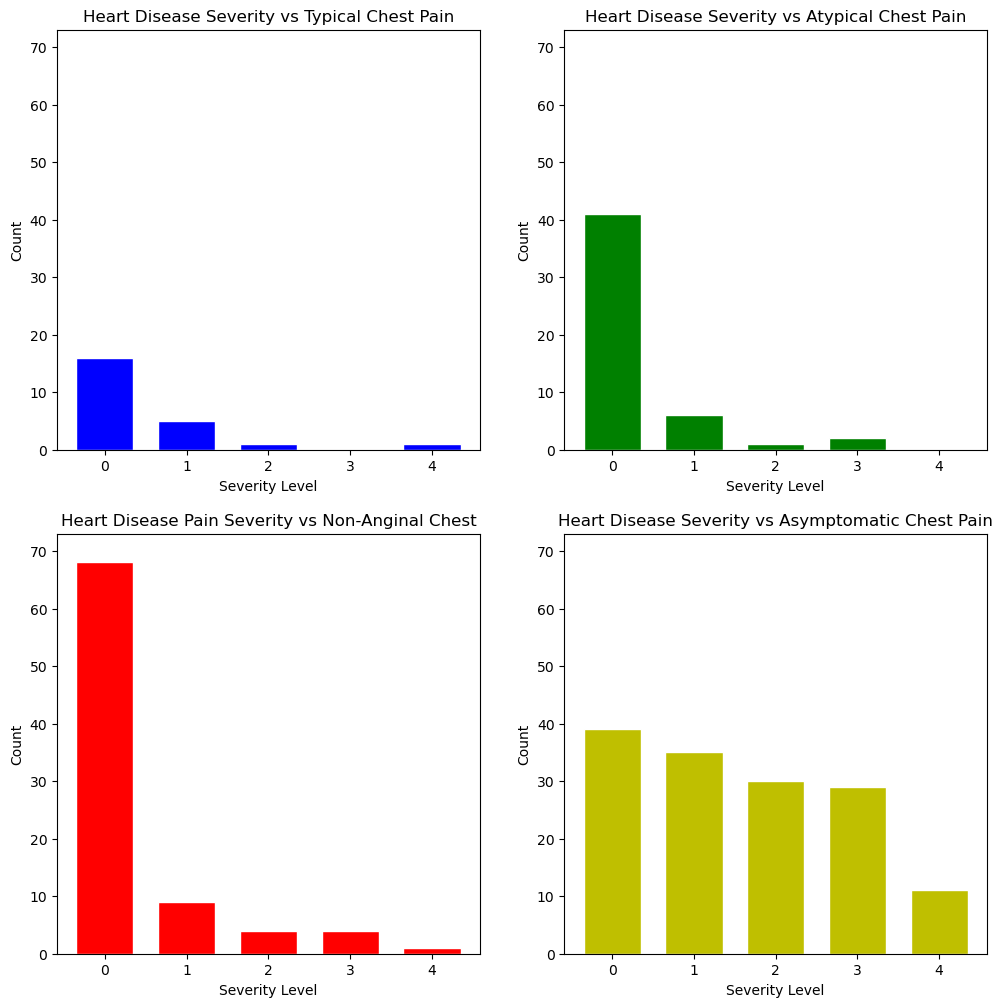

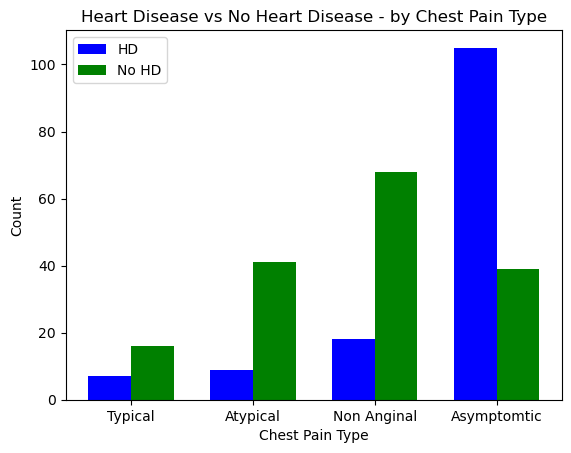

In [15]:
#Chest Pain
typical = 0
typ_severity = [0] * 5
atypical = 0
atyp_severity = [0] * 5
non_anginal = 0
non_severity = [0] * 5
asymptomatic = 0
asymp_severity = [0] * 5
for cp, severity in zip(X['cp'], Y['num']):
    if cp == 1.0:
        typical += 1
        typ_severity[severity] += 1
    elif cp == 2.0:
        atypical += 1
        atyp_severity[severity] += 1
    elif cp == 3.0:
        non_anginal += 1
        non_severity[severity] += 1
    else:
        asymptomatic += 1
        asymp_severity[severity] += 1
x = ['typical', 'atypical', 'non_anginal', 'asymptomatic']
y = [typical, atypical, non_anginal, asymptomatic]

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax[0].set_title('Chest Pain Type vs Participant Count')
ax[0].set_xlabel('Chest Pain Type')
ax[0].set_ylabel('Participant Count')

print(f"Typical Chest Pain Count: {typical}")
print(f"Atypical Chest Pain Count: {atypical}")
print(f"Non-Anginal Chest Pain Count: {non_anginal}")
print(f"Asymptomatic Chest Pain Count: {asymptomatic}")

# Exclude participants with no haeart disease 
typ = 0
atyp = 0
non_ang = 0
asymp = 0
for cp, severity in zip(X['cp'], Y['num']):
    if severity != 0:   
        if cp == 1.0:
            typ += 1
        elif cp == 2.0:
            atyp += 1
        elif cp == 3.0:
            non_ang += 1
        else:
            asymp += 1
x1 = ['typical', 'atypical', 'non_anginal']
y1 = [typ, atyp, non_ang, asymp]

ax[1].bar(x, y1, width=1, edgecolor="white", linewidth=0.7)
ax[1].set_title('Chest Pain Type vs Participant Count')
ax[1].set_xlabel('Chest Pain Type')
ax[1].set_ylabel('Participant Count')

print("\nExcluding participants with no heart disease")
print(f"Typical Chest Pain Count: {typ}")
print(f"Atypical Chest Pain Count: {atyp}")
print(f"Non-Anginal Chest Pain Count: {non_ang}")
print(f"Asymptomatic Chest Pain Count: {asymp}")

y2 = [typ, atyp, non_ang]
ax[2].bar(x1, y2, width=1, edgecolor="white", linewidth=0.7)
ax[2].set_title('Chest Pain Type vs Participant Count (no asymptomatic)')
ax[2].set_xlabel('Chest Pain Type')
ax[2].set_ylabel('Participant Count')
plt.show()

severity_levels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
y_min = 0
y_max = max(max(typ_severity), max(atyp_severity), max(non_severity), max(asymp_severity))
ax[0, 0].set_ylim(y_min, y_max + 5)  
ax[0, 1].set_ylim(y_min, y_max + 5)
ax[1, 0].set_ylim(y_min, y_max + 5)  
ax[1, 1].set_ylim(y_min, y_max + 5)

ax[0, 0].bar(severity_levels, typ_severity, color='b', width=0.7, edgecolor="white")
ax[0, 0].set_title('Heart Disease Severity vs Typical Chest Pain')
ax[0, 0].set_xlabel('Severity Level')
ax[0, 0].set_ylabel('Count')

# Plot for atypical chest pain
ax[0, 1].bar(severity_levels, atyp_severity, color='g', width=0.7, edgecolor="white")
ax[0, 1].set_title('Heart Disease Severity vs Atypical Chest Pain')
ax[0, 1].set_xlabel('Severity Level')
ax[0, 1].set_ylabel('Count')

# Plot for non-anginal chest pain
ax[1, 0].bar(severity_levels, non_severity, color='r', width=0.7, edgecolor="white")
ax[1, 0].set_title('Heart Disease Pain Severity vs Non-Anginal Chest')
ax[1, 0].set_xlabel('Severity Level')
ax[1, 0].set_ylabel('Count')

# Plot for asymptomatic chest pain
ax[1, 1].bar(severity_levels, asymp_severity, color='y', width=0.7, edgecolor="white")
ax[1, 1].set_title('Heart Disease Severity vs Asymptomatic Chest Pain')
ax[1, 1].set_xlabel('Severity Level')
ax[1, 1].set_ylabel('Count')

plt.show()

# Heart disease vs No heart disease for each type of chest pain
typ = 0
ntyp = 0
atyp = 0
natyp = 0
non_ang = 0
n_non_ang = 0
asymp = 0
nasymp = 0
for cp, severity in zip(X['cp'], Y['num']):  
    if cp == 1.0:
        if severity == 0:
            ntyp += 1
        else:
            typ += 1
    elif cp == 2.0:
        if severity == 0:
            natyp += 1
        else:
            atyp += 1
    elif cp == 3.0:
        if severity == 0:
            n_non_ang += 1
        else:
            non_ang += 1
    else:
        if severity == 0:
            nasymp += 1
        else:
            asymp += 1
x2 = ['Typical', 'Atypical', 'Non Anginal', 'Asymptomtic']
y2 = [typ, atyp, non_ang, asymp]
yn2 = [ntyp, natyp, n_non_ang, nasymp]

bar_width = 0.35
r1 = np.arange(len(x2))
r2 = [n + bar_width for n in r1]
plt.bar(r1, y2, color='blue', width=bar_width, label='HD')
plt.bar(r2, yn2, color='green', width=bar_width, label='No HD')

plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease vs No Heart Disease - by Chest Pain Type')
plt.xticks([r + bar_width/2 for r in range(len(x2))], x2)
plt.legend()

# Hypothesis Formulation

Based on my exploratory data analysis, I decided to test this hypothesis.


Hypothesis 1: Males are at a higher risk of developing heart disease compared to females.

- Null Hypothesis (H₀): There is no difference in the risk of heart disease between males and females.

- Alternative Hypothesis (H₁): Males are at a higher risk of heart disease than females.


Hypothesis 2: Higher cholesterol levels are associated with an increased risk of heart disease.

- Null Hypothesis (H₀): There is no relationship between cholesterol levels and likelihood of heart disease.

- Alternative Hypothesis (H₁): Higher cholesterol levels are associated with a higher risk of heart disease.

# Hypothesis Testing

## Hypothesis 1

Males are at a higher risk of developing heart disease compared to females.

- Null Hypothesis (H₀): There is no difference in the risk of heart disease between males and females.

- Alternative Hypothesis (H₁): Males are at a higher risk of heart disease than females.

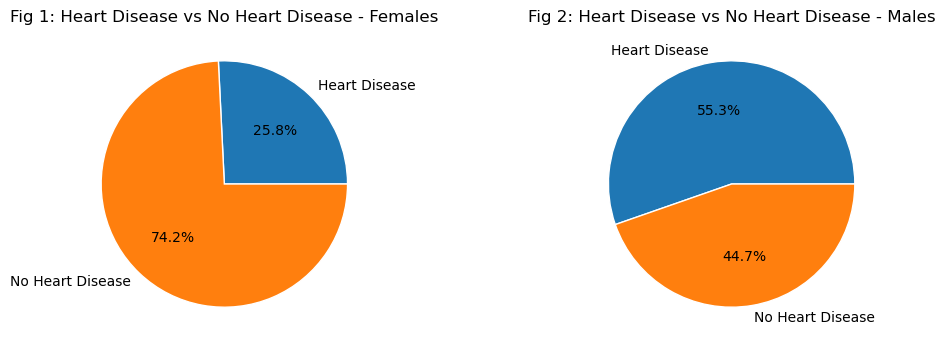

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].pie(fem_pie, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[0].set_title('Fig 1: Heart Disease vs No Heart Disease - Females')
ax[1].pie(male_pie, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax[1].set_title('Fig 2: Heart Disease vs No Heart Disease - Males')
plt.show()

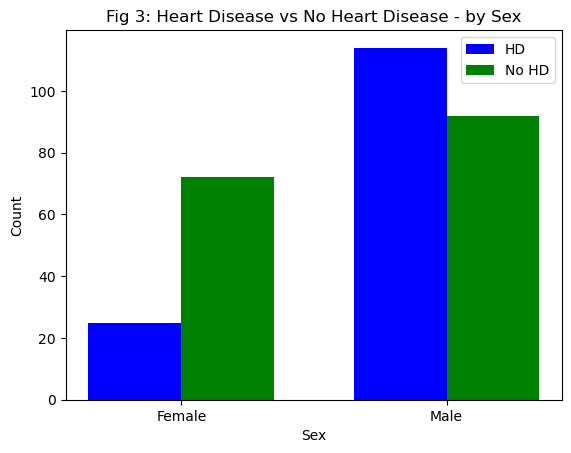

In [17]:
bar_width = 0.35
x = ['Female', 'Male']
y = [female, male]
y_no = [no_fem, no_male]
r1 = np.arange(len(x))
r2 = [n + bar_width for n in r1]
plt.bar(r1, y, color='blue', width=bar_width, label='HD')
plt.bar(r2, y_no, color='green', width=bar_width, label='No HD')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Fig 3: Heart Disease vs No Heart Disease - by Sex')
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.legend()

The bar graph shows us that there is more men with heart disease than without heart disease, while there are more women without heart disease than with heart disease in this dataset. 

Therefore, we can deduce that getting heart disease is more likely for men than women. 

In [18]:
import pandas as pd
from scipy.stats import norm

p_male = male / all_male  
p_female = female / all_fem 

total_hd = male + female  
total_people = all_male + all_fem  
p = total_hd / total_people  

# Standard error
se = np.sqrt(p * (1 - p) * (1/all_male + 1/all_fem))

# Z-stat
Z = (p_male - p_female) / se

# Calculate p-value (one-sided test)
p_value = 1 - norm.cdf(Z)

print(f"Z-score: {Z}")
print(f"p-value: {p_value}")


# Significance
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")

Z-score: 4.818512605081534
p-value: 7.231619486569585e-07

Reject the null hypothesis


Because the p-value is less than 0.05, we reject the null hypothesis for the alternative hypothesis.

Male are at a higher risk of heart disease than female.

## Hypothesis 2

Higher cholesterol levels are associated with an increased risk of heart disease.

- Null Hypothesis (H₀): There is no relationship between cholesterol levels and likelihood of heart disease.

- Alternative Hypothesis (H₁): Higher cholesterol levels are associated with a higher risk of heart disease.

C:\Users\chisa\AppData\Local\Temp\ipykernel_27824\3984126383.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([chol_hd, chol_no], labels=['Heart Disease', 'No Heart Disease'])


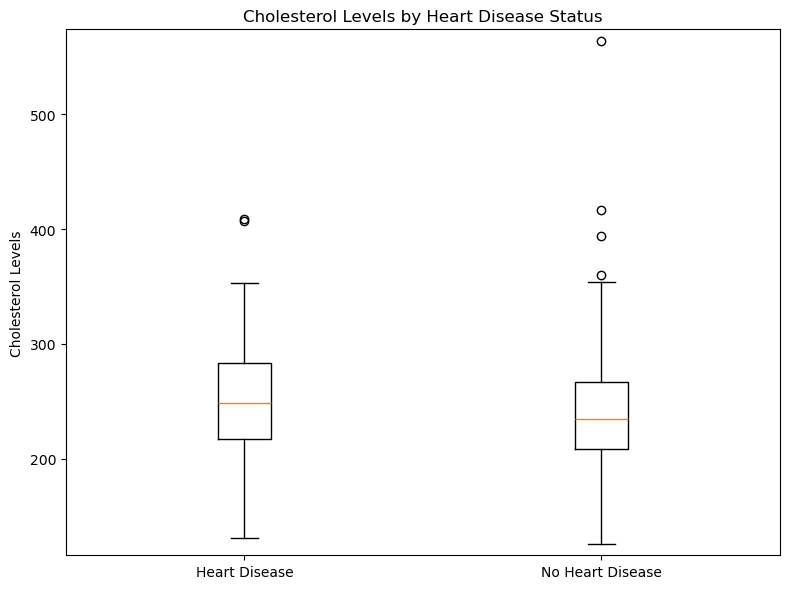

Heart Disease
Minimum: 131
1st Quartile (Q1): 217.5
Median: 249.0
Mean: 251.4748201438849
3rd Quartile (Q3): 283.5
Maximum: 409
Range: 278
Interquartile Range (IQR): 66.0
Standard Deviation: 49.486834866947966

No Heart Disease
Minimum: 126
1st Quartile (Q1): 208.75
Median: 234.5
Mean: 242.640243902439
3rd Quartile (Q3): 267.25
Maximum: 564
Range: 438
Interquartile Range (IQR): 58.5
Standard Deviation: 53.456580304526184


In [66]:
no = []
hd = []
for chol, severity in zip(X['chol'], Y['num']):
    if severity == 0:
        no.append(chol)
    else:
        hd.append(chol)

chol_hd = pd.Series(hd)
chol_no = pd.Series(no)

plt.figure(figsize=(8, 6))

plt.boxplot([chol_hd, chol_no], labels=['Heart Disease', 'No Heart Disease'])

plt.title('Cholesterol Levels by Heart Disease Status')
plt.ylabel('Cholesterol Levels')

ymin = min(chol_hd.min(), chol_no.min()) - 10  # 10 below the minimum value
ymax = max(chol_hd.max(), chol_no.max()) + 10  # 10 above the maximum value
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

print("Heart Disease")
print(f"Minimum: {chol_hd.min()}")
print(f"1st Quartile (Q1): {chol_hd.quantile(0.25)}")
print(f"Median: {chol_hd.median()}")
print(f"Mean: {chol_hd.mean()}")
print(f"3rd Quartile (Q3): {chol_hd.quantile(0.75)}")
print(f"Maximum: {chol_hd.max()}")
print(f"Range: {chol_hd.max() - chol_hd.min()}")
print(f"Interquartile Range (IQR): {chol_hd.quantile(0.75) - chol_hd.quantile(0.25)}")
print(f"Standard Deviation: {chol_hd.std()}")

print("\nNo Heart Disease")
print(f"Minimum: {chol_no.min()}")
print(f"1st Quartile (Q1): {chol_no.quantile(0.25)}")
print(f"Median: {chol_no.median()}")
print(f"Mean: {chol_no.mean()}")
print(f"3rd Quartile (Q3): {chol_no.quantile(0.75)}")
print(f"Maximum: {chol_no.max()}")
print(f"Range: {chol_no.max() - chol_no.min()}")
print(f"Interquartile Range (IQR): {chol_no.quantile(0.75) - chol_no.quantile(0.25)}")
print(f"Standard Deviation: {chol_no.std()}")

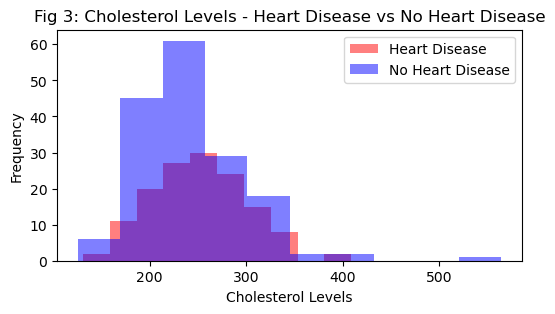

In [67]:
plt.figure(figsize=(6, 3))

# Plot histogram for people with heart disease
plt.hist(chol_hd, bins=10, alpha=0.5, label='Heart Disease', color='red')

# Plot histogram for people without heart disease
plt.hist(chol_no, bins=10, alpha=0.5, label='No Heart Disease', color='blue')

plt.title('Fig 3: Cholesterol Levels - Heart Disease vs No Heart Disease')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [74]:
import numpy as np
import scipy.stats as stats
import pandas as pd

t_stat, p_value = stats.ttest_ind(chol_hd, chol_no, equal_var=True) 
print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

hd_ss = len(chol_hd)
no_hd_ss = len(chol_no)
print("\nsample size hd:", hd_ss)
print("sample size no hd:", no_hd_ss)
print("degrees of freedom", (hd_ss + no_hd_ss - 2))

# Significance
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")

t-stat: 1.4829209163941466
p-value: 0.13914167020436527

sample size hd: 139
sample size no hd: 164
degrees of freedom 301

Fail to reject the null hypothesis


Because the p-value is greater than 0.05, we fail to reject the null hypothesis.

There is not enough evidence to say that higher cholesterol levels are associated with a higher risk of heart disease.

# Documentation & Reporting


## Hypothesis 1
Males are at a higher risk of developing heart disease compared to females.

### Results
* Pie Chart Visualization
    * Fig 1 shows that 25.8% of all female participants had heart disease. 
    * Fig 2 shows that 55.3% of all male particpants had heart disease.
    * From this visualization, we are given strong evidence suggesting that males are at a higher risk of having heart disease.

* Bar Graph Visualization
    * Fig 3 shows that there are more males with heart disease than without whereas there are more females without heart disease than with. This gives strong evidence to support that males are at a higher risk of heart disease.

* One-sided Z-test
    * Z-score: 4.818512605081534
        * This is much greater than 1.645 (95% confidence level), so we reject the null hypothesis for the alternative hypothesis.
    * p-value:  7.231619486569585e-07
        * This value is much smaller than the significance level of 0.05, so there is strong evidence against the null hypothesis.

### Conclusion

From the visualizations and statistical test, the data seems to support the hypothesis that males are at a higher risk of developing heart disease than females. 

## Hypothesis 2
Higher cholesterol levels are associated with an increased risk of heart disease.

### Results
* Box Plot Visualization
    * Fig 1 (Heart Disease)
        * Minimum: 131
        * 1st Quartile (Q1): 217.5
        * Median: 249.0
        * Mean: 251.4748201438849
        * 3rd Quartile (Q3): 283.5
        * Maximum: 409
    * Fig 2 (No Heart Disease)
        * Minimum: 126
        * 1st Quartile (Q1): 208.75
        * Median: 234.5
        * Mean: 242.640243902439
        * 3rd Quartile (Q3): 267.25
        * Maximum: 564
        * Range: 438
    * The median and mean cholesterol levels of people with heart disease being greater than people without heart disease suggests that it is possible for people with higher cholesterol levels having greater risk of heart disease. 

* Histogram Visualization
    * Fig 3 also shows us that the median cholesterol level of people with heart disease being greater than people without heart disease suggests that it is possible for people with higher cholesterol levels having greater risk of heart disease. 

* Two-sided t-test
    * t-stat:   1.4829209163941466
        * This is smaller than 1.960 (critical value for df = 301), so we fail to reject the null hypothesis.
    * p-value:  0.13914167020436527
        * This value is much greater than the significance level of 0.05, so there is little evidence against the null hypothesis.

### Conclusion

From the visualizations and statistical test, the data seems to support different hypotheses. Therefore, it is inconclusive whether high cholesterol highers a person's chances of getting heart disease.